# Bike Share
Bike Share, adalah sebuah data yang mencatat kegiatan rental sepeda. 

In [87]:
import pandas
import matplotlib.pyplot as plt

In [88]:
dataframe = pandas.read_csv("data/bike_share.csv")

# Data exploration
dataframe.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Eksplorasi Data

Sebelum memulai visualisasi data, berikut hasil eksplorasi data `bike_share.csv` :

| No | Kolom | Deskripsi |
|---|---|---|
| 1 | dteday | Tanggal hari pencatatan |
| 2 | season | Musim. Dengan asumsi data berada di bagian utara Bumi, maka 1 adalah musim dingin, 2 semi, 3 panas, 4 gugur. |
| 3 | yr | Tahun ke berapa rental ini terjadi, terhitung dari 2011 sebagai 0 |
| 4 | mnth | Enumerasi bulan pencatatan. 1 = Januari .. 12 = Desember |
| 5 | holiday | 1 = libur 0 = tidak |
| 6 | weekday | Enumerasi hari pencatatan. 0 = Minggu .. 6 = Sabtu |
| 7 | workingday | 1 = hari kerja 0 = tidak |
| 8 | weathersit | Tidak menemukan insight. Mungkin enumerasi cuaca. |
| 9 | temp | Temperatur saat pencatatan |
| 10 | atemp | Rata-rata temperatur saat hari pencatatan |
| 11 | hum | Tingkat kelembapan saat hari pencatatan | 
| 12 | windspeed | Kecepatan angin saat hari pencatatan |
| 13 | casual | Data bisnis. Jumlah pemesanan rental secara casual |
| 14 | registered | Data bisnis. Jumlah pemesanan rental secara registered |
| 15 | total_rentals | Data bisnis. Jumlah pemesanan hari itu (casual + rental) |

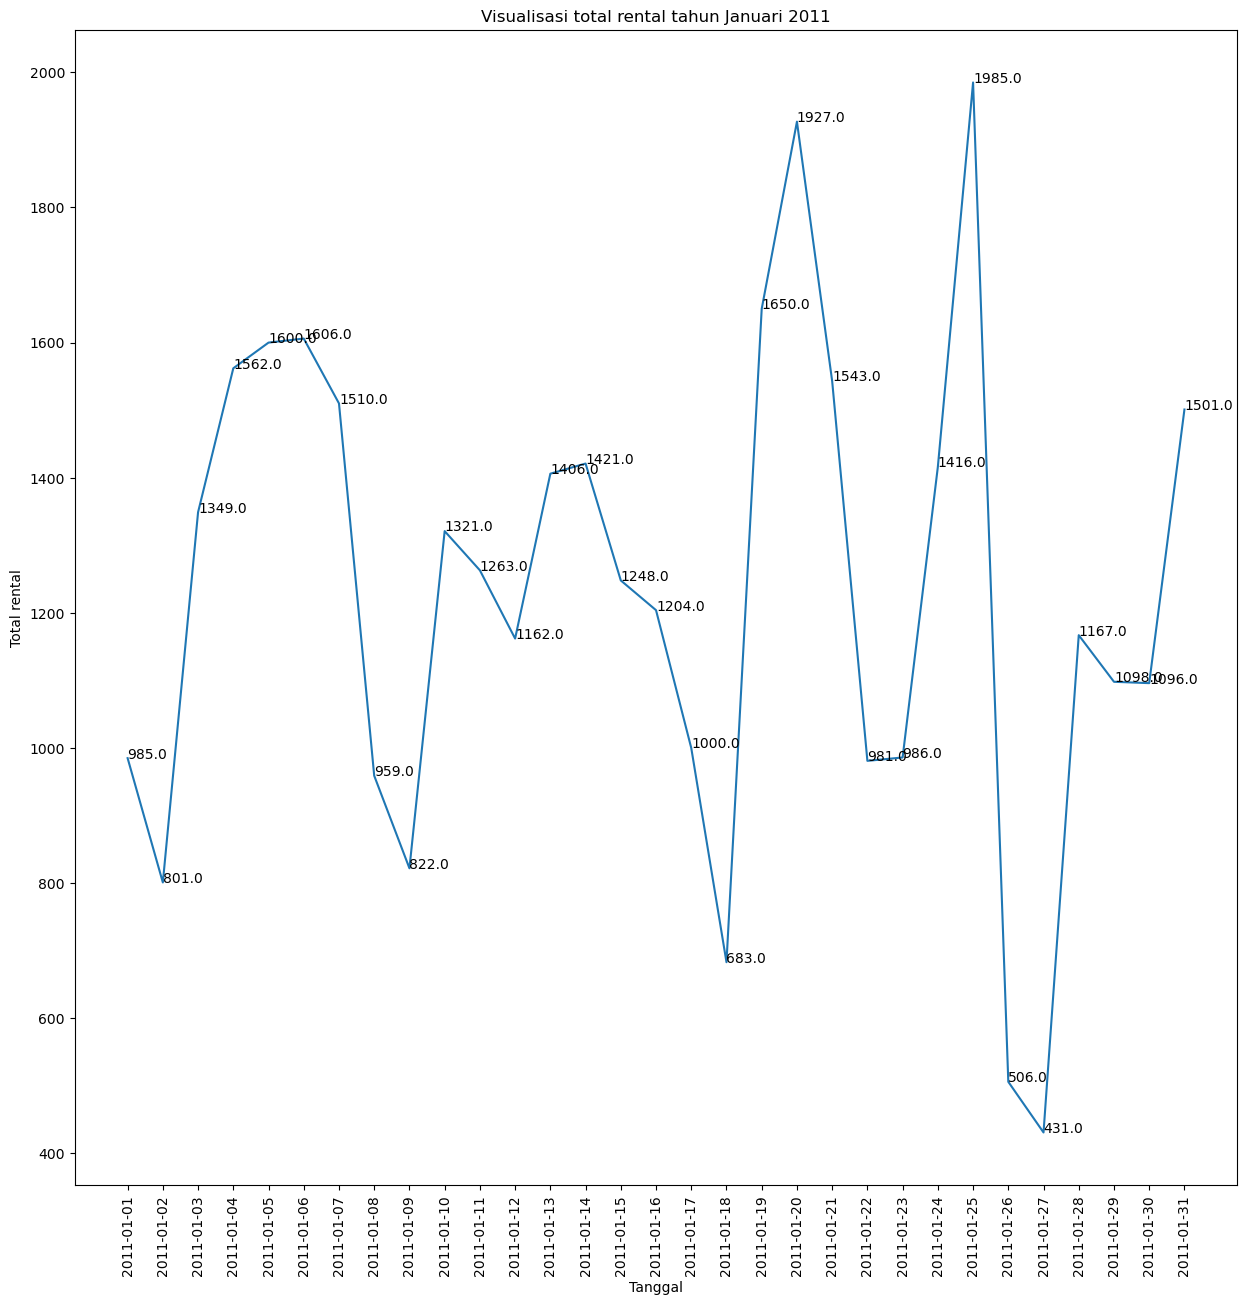

In [89]:
# Visualisasi total rental Januari 2011

dataframe_2011 = dataframe.where((dataframe["dteday"] > "2010-12-31") & (dataframe["dteday"] < "2011-02-01"));
dataframe_2011 = dataframe_2011.dropna()

x = dataframe_2011["dteday"]
y = dataframe_2011["total_rentals"]

plt.figure(figsize=(15, 15))
plt.plot(x, y)
plt.title("Visualisasi total rental tahun Januari 2011")
plt.xlabel("Tanggal")
plt.ylabel("Total rental")
plt.xticks(x, rotation = "vertical")

for i, j in zip(x, y):
    plt.text(i, j, str(j))

plt.show()

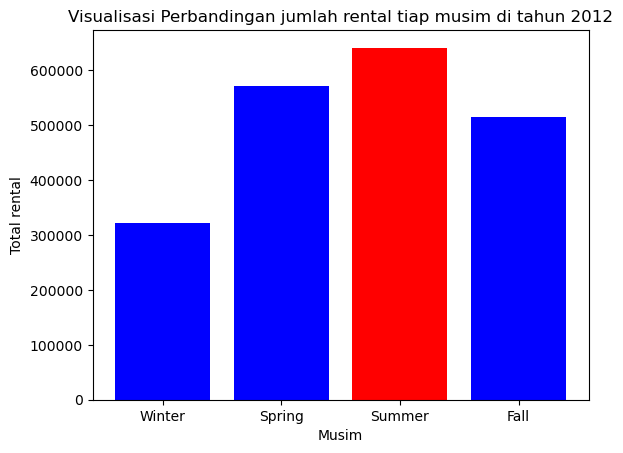

In [90]:
# Perbandingan jumlah rental tiap musim di tahun 2012

dataframe_2012 = dataframe.where((dataframe["dteday"] > "2011-12-31") & (dataframe["dteday"] < "2013-01-01"));
dataframe_2012 = dataframe_2012.dropna()
dataframe_2012.head()

x = ["Winter", "Spring", "Summer", "Fall"]
y = [
        dataframe_2012.loc[dataframe_2012['season'] == 1, 'total_rentals'].sum(), 
        dataframe_2012.loc[dataframe_2012['season'] == 2, 'total_rentals'].sum(),
        dataframe_2012.loc[dataframe_2012['season'] == 3, 'total_rentals'].sum(),
        dataframe_2012.loc[dataframe_2012['season'] == 4, 'total_rentals'].sum()
    ]

colors = ["blue", "blue", "red", "blue"]

plt.bar(x, y, color = colors)

plt.title("Visualisasi Perbandingan jumlah rental tiap musim di tahun 2012")
plt.xlabel("Musim")
plt.ylabel("Total rental")

plt.show()

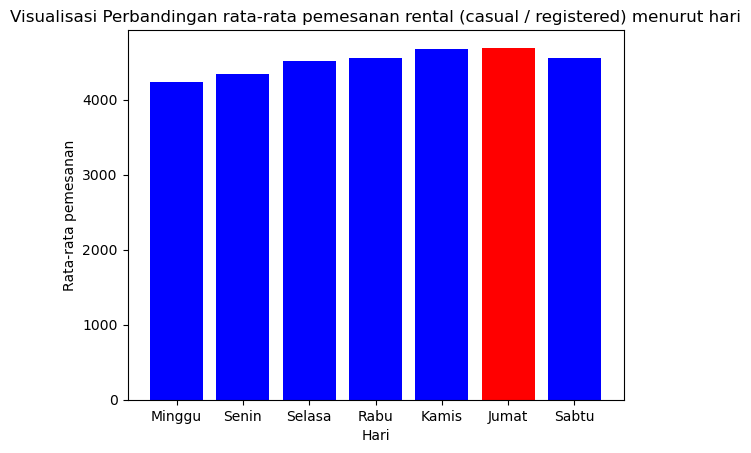

In [91]:
# Perbandingan rata-rata rental menurut hari

x = ["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"]
y = [
        dataframe.loc[dataframe['weekday'] == 0, 'total_rentals'].mean(), 
        dataframe.loc[dataframe['weekday'] == 1, 'total_rentals'].mean(), 
        dataframe.loc[dataframe['weekday'] == 2, 'total_rentals'].mean(), 
        dataframe.loc[dataframe['weekday'] == 3, 'total_rentals'].mean(), 
        dataframe.loc[dataframe['weekday'] == 4, 'total_rentals'].mean(), 
        dataframe.loc[dataframe['weekday'] == 5, 'total_rentals'].mean(), 
        dataframe.loc[dataframe['weekday'] == 6, 'total_rentals'].mean(), 
    ]

# Bikin warna merah biar nandain yang paling tinggi, in which, Jumat

colors = ["blue", "blue", "blue", "blue", "blue", "red", "blue"]

plt.bar(x, y, color = colors)

plt.title("Visualisasi Perbandingan rata-rata pemesanan rental (casual / registered) menurut hari")
plt.xlabel("Hari")
plt.ylabel("Rata-rata pemesanan")


plt.show()